# Задание

Известны ежемесячные данные о продаже вин в Австралии с января 1980 по июнь 1994. Необходимо составить прогноз двумя методами на 8 месяцев - экспоненциальным сглаживанием и сезонной декомпозицией.

Прогнозирование осуществить для любого вида вина по выбору.

# Решение

## Чтение и обработка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Чтение данных:

In [5]:
data = pd.read_csv('wine_Austral2.dat', sep='\t')

In [6]:
data.head(10)

,fort,dry,sweet,red,rose,spark,total,year_,month_,date_
0,2585,1954,85,464,112,1686,15136,1980,1,JAN 1980
1,3368,2302,89,675,118,1591,16733,1980,2,FEB 1980
2,3210,3054,109,703,129,2304,20016,1980,3,MAR 1980
3,3111,2414,95,887,99,1712,17708,1980,4,APR 1980
4,3756,2226,91,1139,116,1471,18019,1980,5,MAY 1980
5,4216,2725,95,1077,168,1377,19227,1980,6,JUN 1980
6,5225,2589,96,1318,118,1966,22893,1980,7,JUL 1980
7,4426,3470,128,1260,129,2453,23739,1980,8,AUG 1980
8,3932,2400,124,1120,205,1984,21133,1980,9,SEP 1980
9,3816,3180,111,963,147,2596,22591,1980,10,OCT 1980


In [7]:
data.tail(10)

,fort,dry,sweet,red,rose,spark,total,year_,month_,date_
164,2132,2914,202,1896,46,1749,22724,1993,9,SEP 1993
165,1772,3686,254,2096,52,3339,28496,1993,10,OCT 1993
166,2526,4358,336,2374,48,4227,32857,1993,11,NOV 1993
167,2755,5587,431,2535,77,6410,37198,1993,12,DEC 1993
168,1154,2265,150,1041,30,1197,13652,1994,1,JAN 1994
169,1568,3685,280,1728,35,1968,22784,1994,2,FEB 1994
170,1965,3754,187,2201,42,1720,23565,1994,3,MAR 1994
171,2659,3708,279,2455,48,1725,26323,1994,4,APR 1994
172,2354,3210,193,2204,44,1674,23779,1994,5,MAY 1994
173,2592,3517,227,2660,45,1693,27549,1994,6,JUN 1994


Я предпочту сделать прогноз для красных вин, отберем данные о красных винах:

In [8]:
data = data[['red', 'year_', 'month_', 'date_']]
data

,red,year_,month_,date_
0,464,1980,1,JAN 1980
1,675,1980,2,FEB 1980
2,703,1980,3,MAR 1980
3,887,1980,4,APR 1980
4,1139,1980,5,MAY 1980
...,...,...,...,...
169,1728,1994,2,FEB 1994
170,2201,1994,3,MAR 1994
171,2455,1994,4,APR 1994
172,2204,1994,5,MAY 1994


In [9]:
data.describe()

,red,year_,month_
count,174.000000,174.000000,174.000000
mean,1591.270115,1986.758621,6.396552
std,582.974416,4.202849,3.460460
min,464.000000,1980.000000,1.000000
25%,1108.000000,1983.000000,3.000000
50%,1542.500000,1987.000000,6.000000
75%,2075.250000,1990.000000,9.000000
max,3330.000000,1994.000000,12.000000


Пропусков в данных нет. Построим график временного ряда.

Text(0.5, 1.0, 'Продажа красных вин')

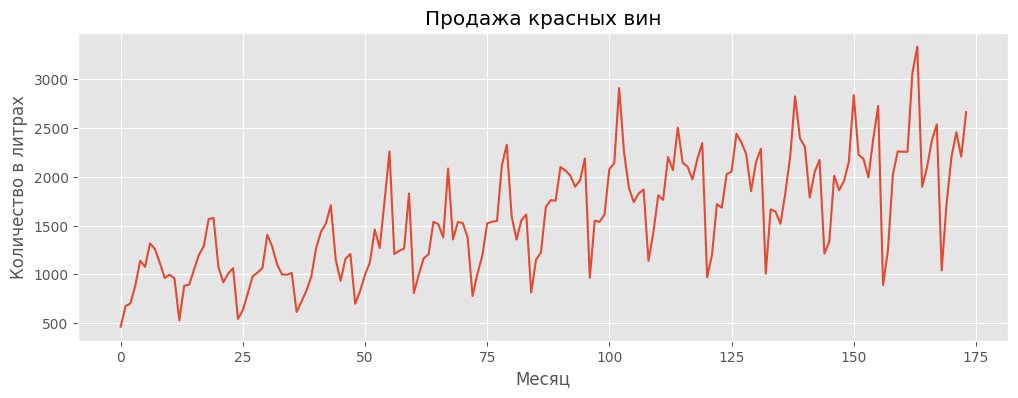

In [26]:
fig = plt.figure(figsize=(12, 4))
data['red'].plot()
plt.xlabel(u'Месяц')
plt.ylabel(u'Количество в литрах')
plt.title(u'Продажа красных вин')

Можно сделать вывод, что тип сезонности - мультипликативный.

## Экспоненциальное сглаживание

In [11]:
from statsmodels.tsa.api import ExponentialSmoothing

In [12]:
#  Всегда trend='additive' по рекомендации Hyndman'а
#  Всегда trend='damped'

fit1 = ExponentialSmoothing(np.asarray(data['red']) ,seasonal_periods=12 ,trend='additive', seasonal='multiplicative', damped = True).fit()

<ipython-input-12-2f84a6596b74>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(np.asarray(data['red']) ,seasonal_periods=12 ,trend='additive', seasonal='multiplicative', damped = True).fit()


Теперь получим предсказания на 8 месяцев вперед:

Количество исходных данных

In [14]:
len(data['red'])

174

Тогда нужно получить предсказания до 181-го месяца включительно:

In [23]:
fitted_ = fit1.predict(0, 181)

Выведем прогноз и исходные данные на график:

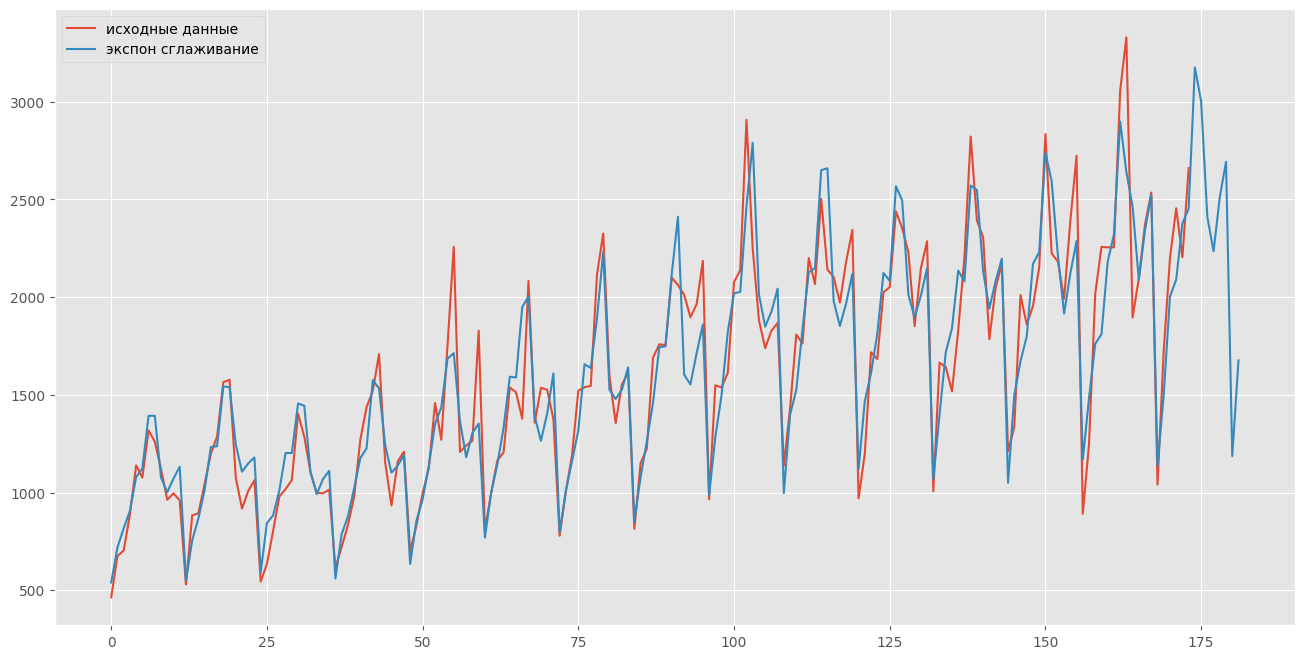

In [24]:
plt.figure(figsize=(16,8))
plt.plot(np.asarray(data['red']), label='исходные данные')
plt.plot(fitted_, label='экспон сглаживание')
plt.legend(loc='best')
plt.show()

Прогнозируемые данные:

In [25]:
fitted_[174:182]

array([3175.31246651, 3003.25010739, 2410.21106276, 2234.6227673 ,
       2512.46896012, 2692.68830859, 1186.72345877, 1676.12602072])

## Сезонная декомпозиция

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

Применим сезонную декомпозицию:

In [30]:
result = seasonal_decompose(data['red'], model='multiplicative', period=12)

Выведим результаты сезонной декомпозиции на графиках:

<Figure size 1800x800 with 0 Axes>

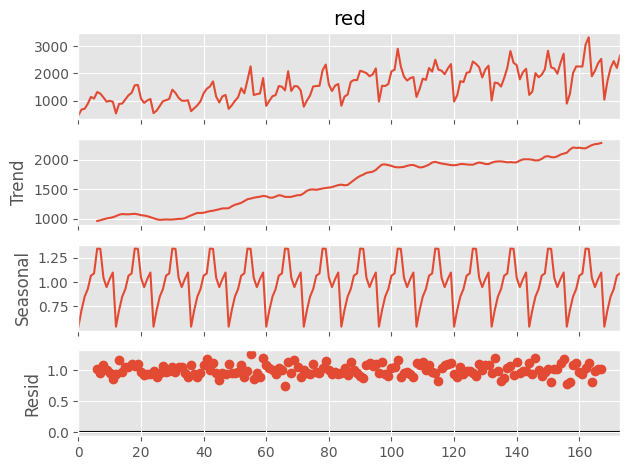

In [31]:
#  Результаты сезонной декомпозиции

plt.figure(figsize=(18,8))
result.plot()

plt.tight_layout()

Видно, что тренд не идеально линейный, но в целом можно допустить, что он все-таки линейный

In [32]:
print(result.trend)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
169   NaN
170   NaN
171   NaN
172   NaN
173   NaN
Name: trend, Length: 174, dtype: float64


In [33]:
result.trend.head(12)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6      966.250000
7      977.666667
8      994.291667
9     1008.833333
10    1017.916667
11    1029.166667
Name: trend, dtype: float64

Для предсказания необходимо удалить NaN и использовать опережающее скользящее среднее:

In [35]:
#  Опережающее скользящее среднее вместо центрированного скользящего среднего

trend = pd.DataFrame({"trend": result.trend.dropna(),
'month_num': range(12, 174)})
trend

,trend,month_num
6,966.250000,12
7,977.666667,13
8,994.291667,14
9,1008.833333,15
10,1017.916667,16
...,...,...
163,2216.708333,169
164,2244.416667,170
165,2260.333333,171
166,2266.458333,172


In [50]:
#  Готовим предикторы для квадратичной и кубической регрессий

trend['num^2'] = trend['month_num']**2
trend['num^3'] = trend['month_num']**3
trend['num^4'] = trend['month_num']**4
trend.head(10)

,trend,month_num,num^2,num^3,num^4
6,966.250000,12,144,1728,20736
7,977.666667,13,169,2197,28561
8,994.291667,14,196,2744,38416
9,1008.833333,15,225,3375,50625
10,1017.916667,16,256,4096,65536
11,1029.166667,17,289,4913,83521
12,1048.208333,18,324,5832,104976
13,1071.708333,19,361,6859,130321
14,1083.083333,20,400,8000,160000
15,1079.375000,21,441,9261,194481


In [51]:
#  Создаем отклик
y = trend['trend']

In [52]:
#  Предикторы для линейного тренда
X1 = trend.drop(columns=['trend', 'num^2', 'num^3', 'num^4'])

#  Предикторы для квадратичного тренда
X2 = trend.drop(columns=['trend', 'num^3', 'num^4'])

#  Предикторы для кубического тренда
X3 = trend.drop(columns=['trend', 'num^4'])

#  Предикторы для тренда в четвертой степени
X4 = trend.drop(columns=['trend'])

Прогнозируем тренд, используя полиномиальную регрессию <br>
Обучаем три модели, ищем лучшую <br>

In [42]:
from sklearn.linear_model import LinearRegression

In [53]:
#  Линейная модель
model1 = LinearRegression()
model1.fit(X1, y)

coef = pd.DataFrame(list(zip(['intercept'] + X1.columns.tolist(), [model1.intercept_] + model1.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,811.362984
1,month_num,8.470486


In [54]:
#  Парабола
model2 = LinearRegression()
model2.fit(X2, y)

coef = pd.DataFrame(list(zip(['intercept'] + X2.columns.tolist(), [model2.intercept_] + model2.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,735.544842
1,month_num,10.672657
2,num^2,-0.011904


In [55]:
#  Кубическая парабола
model3 = LinearRegression()
model3.fit(X3, y)

coef = pd.DataFrame(list(zip(['intercept'] + X3.columns.tolist(), [model3.intercept_] + model3.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,947.697760
1,month_num,-0.116189
2,num^2,0.125858
3,num^3,-0.000496


In [56]:
#  Парабола в четвертой степени
model4 = LinearRegression()
model4.fit(X4, y)

coef = pd.DataFrame(list(zip(['intercept'] + X4.columns.tolist(), [model4.intercept_] + model4.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,1373.815510
1,month_num,-31.579369
2,num^2,0.802529
3,num^3,-0.005973
4,num^4,0.000015


In [57]:
y1 = model1.predict(X1)

y2 = model2.predict(X2)

y3 = model3.predict(X3)

y4 = model4.predict(X4)

<Axes: >

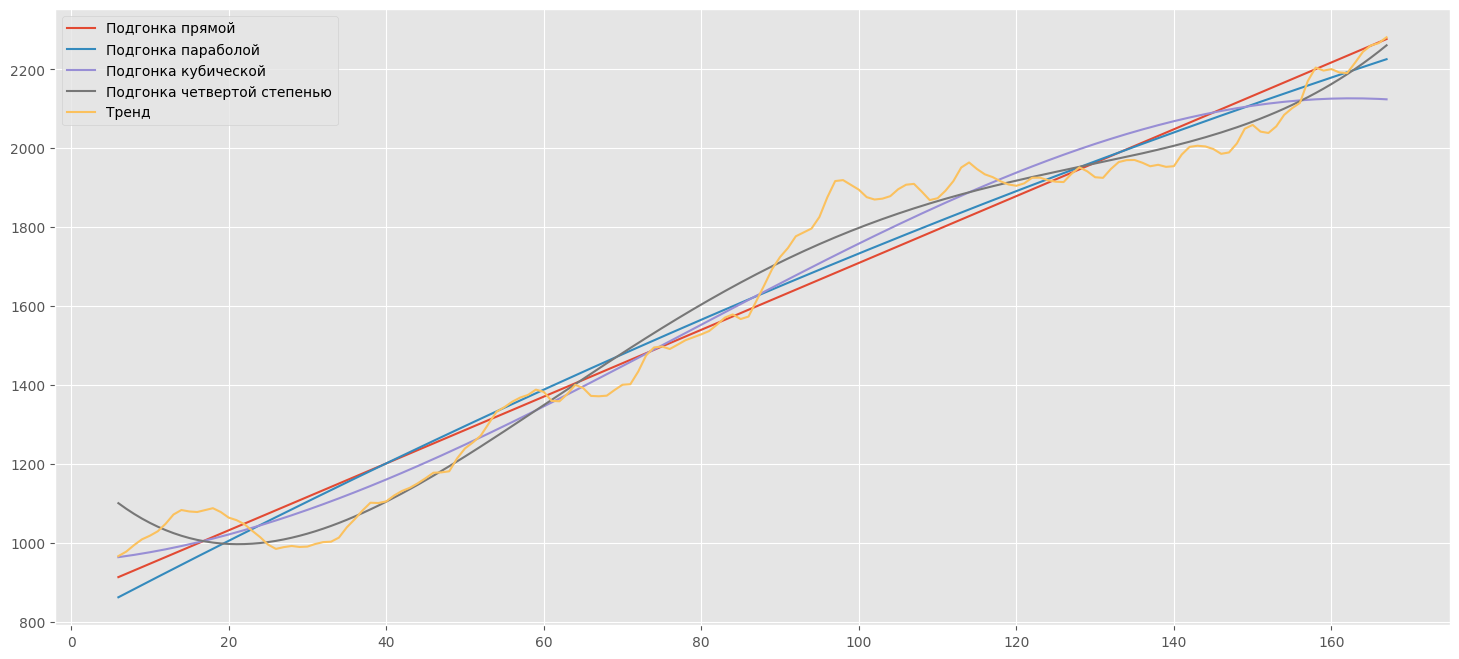

In [58]:
pred_trend = pd.DataFrame({
    'Подгонка прямой': y1,
    'Подгонка параболой': y2,
    'Подгонка кубической': y3,
    'Подгонка четвертой степенью': y4,
    'Тренд': y})
pred_trend.plot(figsize=(18,8))

Мне больше всего кажется подходящей подгонка в четвертой степени

In [91]:
#  Готовим данные для вычисления прогнозов.
#  Модель уже отобрана и готова

X_forecast = pd.DataFrame({'month_num': range(174, 182)})

In [92]:
X_forecast['num^2'] = X_forecast['month_num']**2
X_forecast['num^3'] = X_forecast['month_num']**3
X_forecast['num^4'] = X_forecast['month_num']**4

In [93]:
X_forecast

,month_num,num^2,num^3,num^4
0,174,30276,5268024,916636176
1,175,30625,5359375,937890625
2,176,30976,5451776,959512576
3,177,31329,5545233,981506241
4,178,31684,5639752,1003875856
5,179,32041,5735339,1026625681
6,180,32400,5832000,1049760000
7,181,32761,5929741,1073283121


In [94]:
#  Собственно прогноз для тренда

forecast_ = model4.predict(X_forecast)

In [95]:
forecast_

array([2277.53613292, 2294.99144761, 2313.21974709, 2332.24753839,
       2352.10168381, 2372.80940087, 2394.39826236, 2416.89619632])

Добавляем в прогноз сезонные поправки

In [96]:
#  Вспоминаем, как выглядят сезонные поправки

result.seasonal.head(24)

0     0.540901
1     0.712132
2     0.850900
3     0.928713
4     1.066588
5     1.089238
6     1.344878
7     1.342447
8     1.045089
9     0.948480
10    1.031874
11    1.098758
12    0.540901
13    0.712132
14    0.850900
15    0.928713
16    1.066588
17    1.089238
18    1.344878
19    1.342447
20    1.045089
21    0.948480
22    1.031874
23    1.098758
Name: seasonal, dtype: float64

Нужно помнить, что сезонность считалась с января, а мы делаем прогноз с июля, поэтому нужно брать начиная с 6-го элемента

In [109]:
#  Поскольку сезонные поправки мультипликативные, перемножаем.

forecast_2 = forecast_ * result.seasonal.iloc[6:14]

Добавим месяцы прогноза

In [110]:
horizon_ = 8

#   Номера месяцев, для которых делается прогноз

valid = range(len(data), len(data)+horizon_, 1)

In [111]:
forecast_2.index = list(valid)

In [112]:
forecast_2

174    3063.007484
175    3080.904069
176    2417.521627
177    2212.091213
178    2427.072075
179    2607.144274
180    1295.132932
181    1721.149398
Name: seasonal, dtype: float64

Добавим в прогноз данные за последний месяц, чтобы график отображался корректно

In [113]:
df = pd.DataFrame([data.iloc[len(data['red']) - 1]['red']])
forecast_2 = pd.concat([df, forecast_2])
forecast_2.rename(index={0:len(data['red']) - 1},inplace=True)

In [114]:
forecast_2

,0
173,2660.000000
174,3063.007484
175,3080.904069
176,2417.521627
177,2212.091213
178,2427.072075
179,2607.144274
180,1295.132932
181,1721.149398


Text(0.5, 1.0, 'Прогноз продажи красных вин Сезонная декомпозиция')

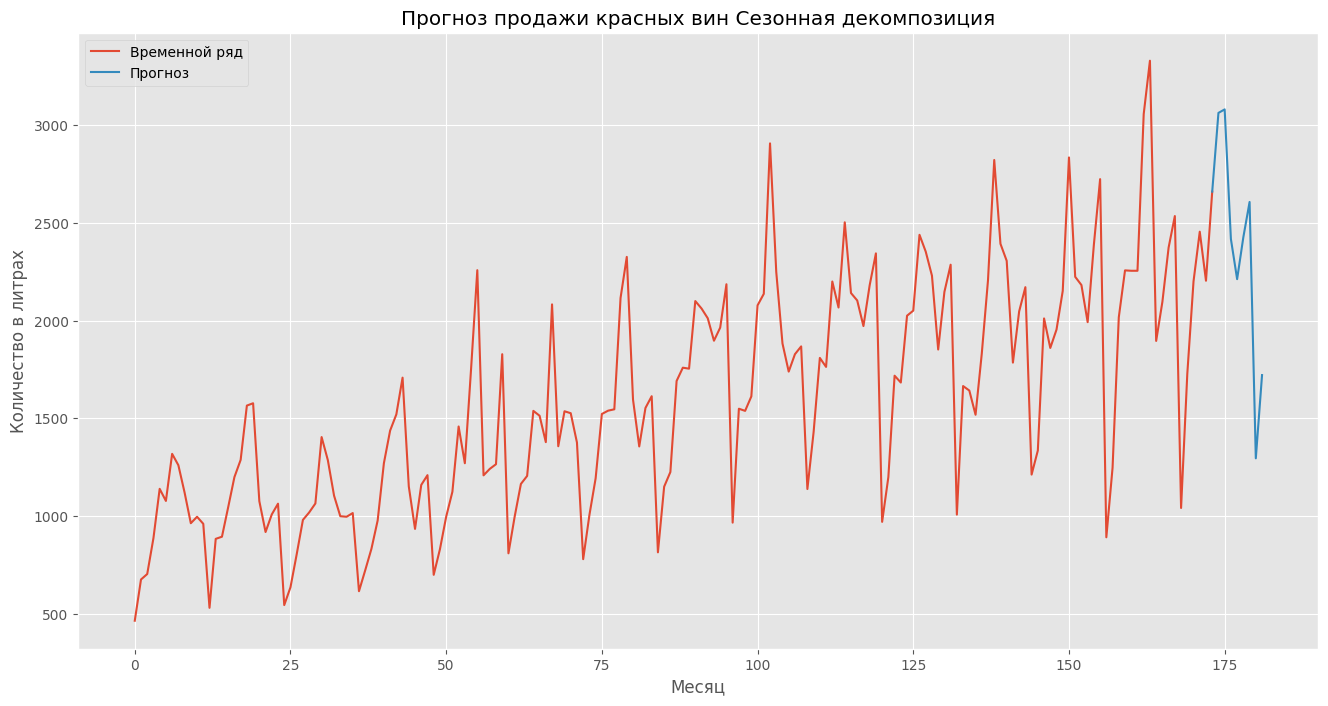

In [115]:
#  Ряд и прогноз

plt.figure(figsize=(16,8))
plt.plot(data['red'], label='Временной ряд')
plt.plot(forecast_2, label='Прогноз')
plt.legend(loc='best')

plt.xlabel(u'Месяц')
plt.ylabel(u'Количество в литрах')
plt.title(u'Прогноз продажи красных вин Сезонная декомпозиция')